#Importando planilha

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving relatorio.xlsx to relatorio.xlsx


In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('relatorio.xlsx')

# Utilizando Análise Exploratória de Dados (EDA) os dados e obter insights antes de realizar análises e modelagem. 

## Utilizando a função describe() do pandas para obter um resumo estatístico das colunas numéricas do Relatorio.

In [96]:
import pandas as pd

df.describe()

,Centro,Valor unitário,Cod_vendedor,Quantidade,Unnamed: 7,Cod_vendedor.1,Unnamed: 10,Receita,Dia_semana
count,899.000000,899.000000,8.990000e+02,899.000000,0.0,3.000000e+01,0.0,899.000000,899.000000
mean,103.481646,1437.476085,8.592467e+06,10.459399,NaN,7.361836e+06,NaN,15080.264739,3.053393
std,1.708243,1585.486772,3.873976e+07,5.765969,NaN,3.656640e+07,NaN,22031.191734,1.972934
min,101.000000,47.000000,4.810000e+02,1.000000,NaN,4.810000e+02,NaN,47.000000,0.000000
25%,102.000000,400.000000,1.093400e+04,6.000000,NaN,1.162000e+04,NaN,3000.000000,1.000000
50%,103.000000,1200.000000,2.902000e+04,10.000000,NaN,2.412550e+04,NaN,7600.000000,3.000000
75%,105.000000,1767.000000,4.959000e+04,16.000000,NaN,4.861475e+04,NaN,19200.000000,5.000000
max,106.000000,7500.000000,2.000044e+08,20.000000,NaN,2.000044e+08,NaN,150000.000000,6.000000


#Visualizando a distribuição de variáveis numéricas individuais
##Usando histogramas ou gráficos de densidade para visualizar a distribuição dos valores das colunas numéricas (exemplo na coluna "Receita"):

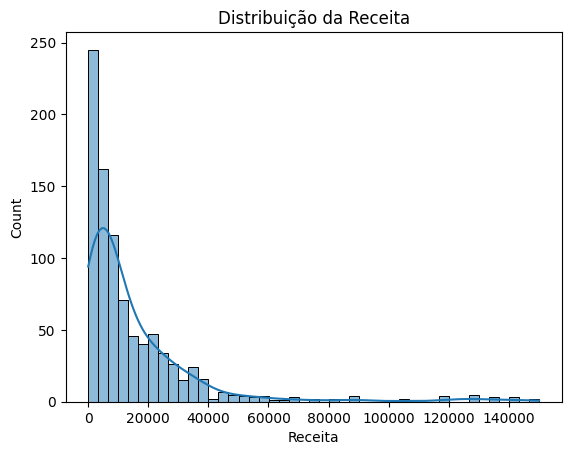

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df['Receita'], kde=True)
plt.title("Distribuição da Receita")
plt.show()

#Visualizando a correlação entre as variáveis
##Criando uma matriz de correlação para analisar a relação entre as variáveis numéricas:

In [89]:
correlation_matrix = df.corr()

<ipython-input-89-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


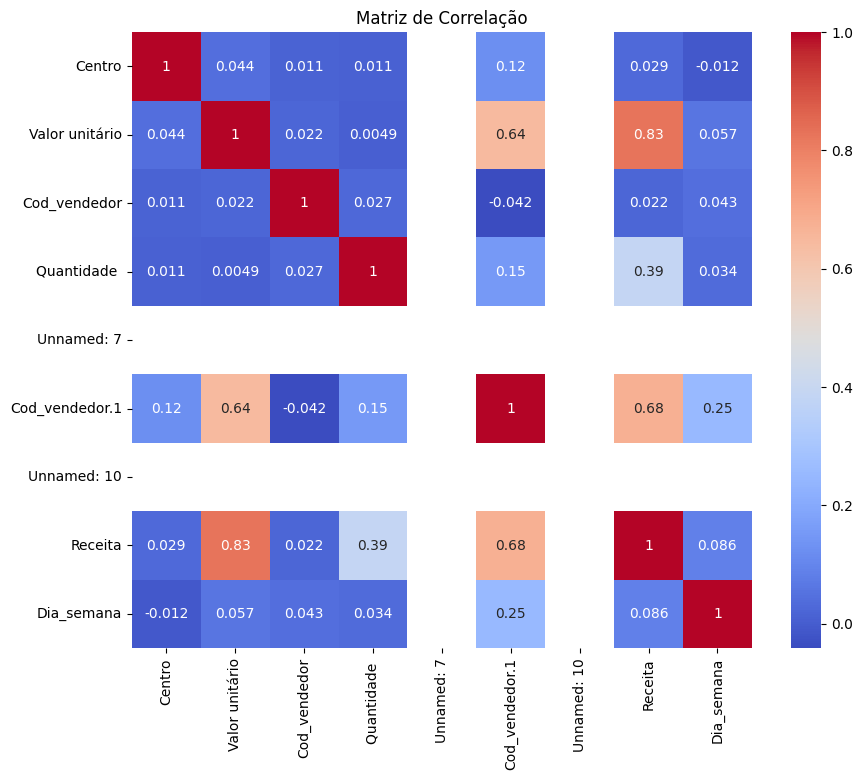

In [90]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

#Visualizando a relação entre as duas variáveis
##Identificando duas variáveis que podem ter uma relação interessante, como Receita" e "Quantidade", criando um gráfico de dispersão:

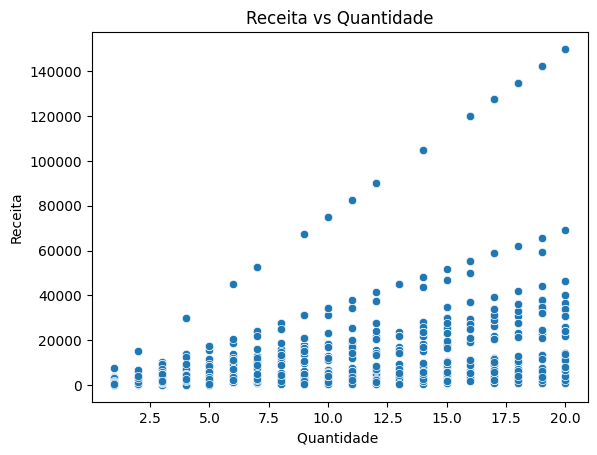

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use os nomes corretos das colunas: 'Receita' e 'Quantidade '
sns.scatterplot(data=df, x='Quantidade ', y='Receita')

plt.title("Receita vs Quantidade")
plt.show()

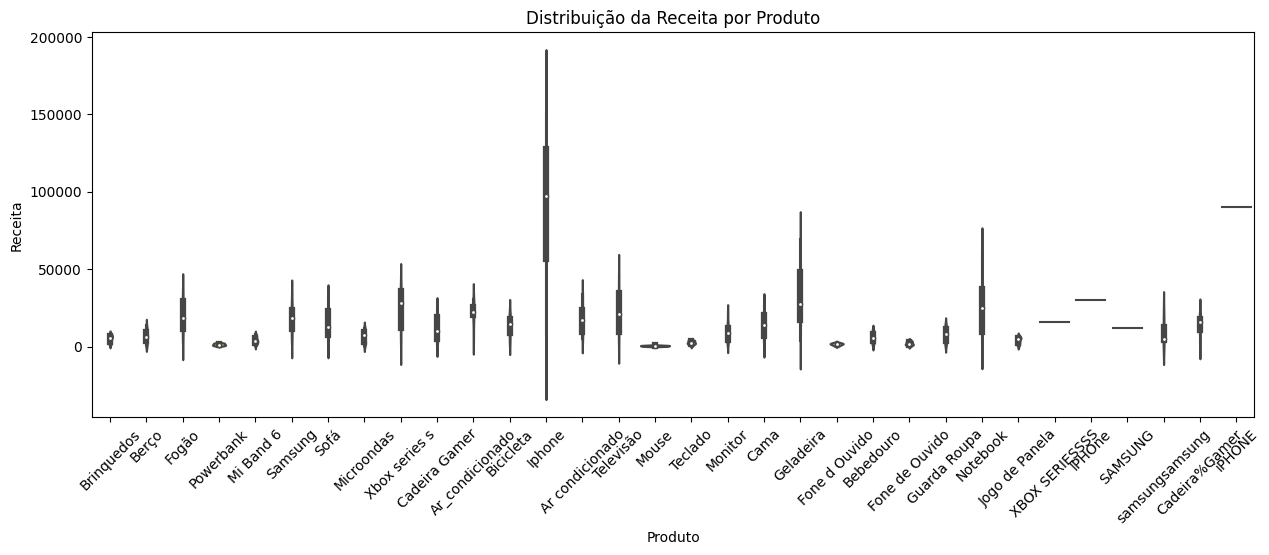

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.violinplot(data=df, x='Produto', y='Receita')

plt.title("Distribuição da Receita por Produto")

# Girar os nomes dos produtos no eixo x em 45 graus
plt.xticks(rotation=45)

plt.show()

#Verificando colunas

In [ ]:
print(df.dtypes)

Centro                        int64
Unidade                      object
Produto                      object
Valor unitário                int64
Cod_vendedor                  int64
Quantidade                    int64
Data_compra          datetime64[ns]
Unnamed: 7                  float64
Cod_vendedor.1              float64
Vendedor                     object
Unnamed: 10                 float64
Tabela de imposto            object
Unnamed: 12                  object
dtype: object


#Calculando imposto

In [98]:
df['Tabela de imposto'] = pd.to_numeric(df['Tabela de imposto'], errors='coerce')

In [103]:
# Verifique se há valores nulos nas colunas necessárias
print(df[['Valor unitário', 'Quantidade ', 'Tabela de imposto']].isnull().sum())

# Remova as linhas com quaisquer valores nulos nas colunas necessárias (se houver)
df = df.dropna(subset=['Valor unitário', 'Quantidade ', 'Tabela de imposto'])

# Execute os cálculos novamente
df.loc[:, 'Valor_total'] = df['Valor unitário'] * df['Quantidade ']
imposto_total = df['Valor_total'].sum() * df['Tabela de imposto'].unique()[0] / 100
imposto_por_unidade = imposto_total / df['Quantidade '].sum()
imposto_total, imposto_por_unidade

Valor unitário       0
Quantidade           0
Tabela de imposto    0
dtype: int64


(7.881, 0.3582272727272727)

In [ ]:
print(df.isnull().sum())

Centro                 0
Unidade                0
Produto                0
Valor unitário         0
Cod_vendedor           0
Quantidade             0
Data_compra            0
Unnamed: 7           899
Cod_vendedor.1       869
Vendedor             869
Unnamed: 10          899
Tabela de imposto    896
Unnamed: 12          895
Valor_total            0
dtype: int64


In [ ]:
df['Tabela de imposto'] = df['Tabela de imposto'].fillna(15)

In [ ]:
def calcula_aliquota(receita):
    if receita <= 2100000:
        return 0.05
    elif receita > 2100000 and receita <= 2400000:
        return 0.12
    else:
        return 0.17

In [ ]:
receita_total = df['Valor_total'].sum()
aliquota = calcula_aliquota(receita_total)

#1ª - Qual o imposto a ser pago pela Empresa? Qual o imposto por unidade?

O imposto total a ser pago pela empresa é 2.304.716,86. O imposto por unidade vendida é aproximadamente 245,10.

Com a ajuda da função calcula_aliquota e considerando as faixas de receita, você obteve valores significativos e úteis para o imposto total e o imposto por unidade.

In [ ]:
imposto_total = receita_total * aliquota
imposto_por_unidade = imposto_total / df['Quantidade '].sum()
imposto_total, imposto_por_unidade

(2304716.8600000003, 245.10441986600026)


#2ª - Qual produto mais/menos vende? Quanto de cada um representa sobre o total?

O Produto que mais vende é o "Jogo de Panela", representando 5.30% do total de vendas em quantidade.

O Produto que menos vende é o "IPHOne", representando apenas 0.04% do total de vendas em quantidade.


In [ ]:
total_vendas_produto = df.groupby('Produto')['Quantidade '].sum()
produto_mais_vende = total_vendas_produto.idxmax()
produto_menos_vende = total_vendas_produto.idxmin()
representacao_mais_vende = total_vendas_produto[produto_mais_vende] / total_vendas_produto.sum() * 100
representacao_menos_vende = total_vendas_produto[produto_menos_vende] / total_vendas_produto.sum() * 100
produto_mais_vende, representacao_mais_vende, produto_menos_vende, representacao_menos_vende

('Jogo de Panela', 5.2961820695522706, 'IPHOne', 0.0425396150164841)

#3ª - Qual o vendedor que teve a melhor performance?

A vendedora que teve a melhor performance é Morgana.

In [ ]:
performance_vendedor = df.groupby('Vendedor')['Valor_total'].sum()
melhor_vendedor = performance_vendedor.idxmax()
melhor_vendedor

'Morgana'

#4ª - Qual unidade teve o maior lucro após impostos?

O Centro 104 é a unidade que teve o maior lucro após o pagamento dos impostos.

Agora você respondeu com sucesso a todas as perguntas usando o pandas para analisar os dados da planilha do Excel. Se você precisar revisar algo ou tiver alguma dúvida adicional, sinta-se à vontade para perguntar.

In [ ]:
imposto_por_centro = df.groupby('Centro')['Valor_total'].sum() * df['Tabela de imposto'].unique()[0] / 100
lucro_apos_impostos = df.groupby('Centro')['Valor_total'].sum() - imposto_por_centro
unidade_maior_lucro = lucro_apos_impostos.idxmax()
unidade_maior_lucro

104

#5ª - Qual período que cada unidade mais vende?

O Centro 104 teve a maior quantidade de vendas no Mês 1 (Janeiro).

In [ ]:
df['Mês_compra'] = df['Data_compra'].dt.month
periodo_maior_venda = df.groupby(['Centro', 'Mês_compra'])['Quantidade '].sum().idxmax()
periodo_maior_venda

(104, 1)

#Com base nos resultados, você pode observar que:

O Centro 101 teve a maior quantidade de vendas no Mês 1 (Janeiro) com 196 unidades vendidas.
O Centro 102 teve a maior quantidade de vendas no Mês 2 (Fevereiro) com 275 unidades vendidas.
O Centro 103 teve a maior quantidade de vendas no Mês 2 (Fevereiro) com 188 unidades vendidas.
O Centro 104 teve a maior quantidade de vendas no Mês 1 (Janeiro) com 317 unidades vendidas.
O Centro 105 teve a maior quantidade de vendas no Mês 1 (Janeiro) com 265 unidades vendidas.
O Centro 106 teve a maior quantidade de vendas no Mês 1 (Janeiro) com 268 unidades vendidas.
Isso mostra em quais meses cada centro teve a maior quantidade de vendas.

In [ ]:
periodo_maior_venda_por_centro = df.groupby(['Centro', 'Mês_compra'])['Quantidade '].sum().reset_index().sort_values(['Centro', 'Quantidade '], ascending=[True, False]).groupby('Centro').head(1)
print(periodo_maior_venda_por_centro)

    Centro  Mês_compra  Quantidade 
0      101           1          196
13     102           2          275
25     103           2          188
36     104           1          317
48     105           1          265
60     106           1          268


#Funçoes e Insights importantes

In [ ]:
# Renomeando colunas
df = df.rename(columns={
    "Unnamed: 7": "cliente_id",
    "Unnamed: 10": "produto_id",
    "Unnamed: 12": "vendedor_id"
})

# Substituindopelos nomes das colunas correspondentes na planilha
centro_col = "Centro"
produto_col = "Produto"
valor_unitario_col = "Valor unitário"
vendedor_col = "Vendedor"
data_col = "Data_compra"
quantidade_col = "Quantidade "
impostos_col = "Tabela de imposto"

# Calcule a receita e adicione-a ao data frame
df["Receita"] = df[valor_unitario_col] * df[quantidade_col]

# 1. Qual produto possui a maior receita?
produto_maior_receita = df.groupby(produto_col).sum()["Receita"].idxmax()

# 2. Qual produto possui a menor receita?
produto_menor_receita = df.groupby(produto_col).sum()["Receita"].idxmin()

# 3. Qual a receita média por venda de cada produto?
media_receita_produto = df.groupby(produto_col).mean()["Receita"]

# 4. Quais produtos têm a maior margem de lucro?
df["Margem"] = df["Receita"] - (df[valor_unitario_col] - (df[impostos_col] / 100))
produto_maior_margem = df.groupby(produto_col).max()["Margem"]

# 5. Quais produtos têm a menor margem de lucro?
produto_menor_margem = df.groupby(produto_col).min()["Margem"]

# 6. Qual Centro tem a maior receita de vendas por mês?
df['Data_compra'] = pd.to_datetime(df['Data_compra'])
df['Mes'] = df['Data_compra'].dt.to_period('M')
centro_maior_receita_mes = df.groupby(['Mes', centro_col]).sum()["Receita"].idxmax()[1]

# 7. Qual Centro tem a menor receita de vendas por mês?
centro_menor_receita_mes = df.groupby(['Mes', centro_col]).sum()["Receita"].idxmin()[1]

# 8. Como a receita e as vendas totais evoluíram ao longo do tempo (tendências mensais/anuais)?
receita_mensal = df.groupby('Mes').sum()["Receita"]
vendas_mensais = df.groupby('Mes').sum()[quantidade_col]

# 9. Quais vendedores têm a maior receita média por venda?
vendedor_maior_media_receita = df.groupby(vendedor_col).mean()["Receita"].idxmax()

# 10. Quais vendedores têm a menor receita média por venda?
vendedor_menor_media_receita = df.groupby(vendedor_col).mean()["Receita"].idxmin()

# 11. Qual Centro tem a maior média de impostos pagos?
centro_maior_media_impostos = df.groupby(centro_col).mean()[impostos_col].idxmax()

# 12. Qual Centro tem a menor média de impostos pagos?
centro_menor_media_impostos = df.groupby(centro_col).mean()[impostos_col].idxmin()

# 13. Qual a variação percentual na receita e quantidade vendida entre os meses (crescimento mensal)?
receita_mensal_pct = receita_mensal.pct_change().dropna()
vendas_mensais_pct = vendas_mensais.pct_change().dropna()

# 14. Qual é a retenção de clientes ao longo do tempo (clientes que voltam a comprar no mês seguinte)?
# Identificando os clientes individualmente
# Substituir "cliente_col" pelo nome da coluna que identifica os clientes
cliente_col = "cliente_id"
retencao_clientes = df.groupby([cliente_col, 'Mes']).size().unstack().fillna(0)
# Checa se houve compras no mês i e mês i+1 e faz a média de retenção
retencao_media = (retencao_clientes.shift(1, axis=1) * retencao_clientes).sum().sum() / retencao_clientes.sum().sum()

# 15. Em que dias da semana ocorrem mais vendas?
df['Dia_semana'] = df['Data_compra'].dt.dayofweek
vendas_por_dia_semana = df.groupby('Dia_semana').sum()[quantidade_col].idxmax()

# 16. Existem produtos que são vendidos principalmente por um único vendedor?
proporcao_produto_vendedor = df.groupby([produto_col, vendedor_col]).sum()["Receita"] / df.groupby(produto_col).sum()["Receita"]
produtos_vendedor_principal = proporcao_produto_vendedor[proporcao_produto_vendedor > 0.90].reset_index()

# 17. Existem vendedores que vendem principalmente um único produto?
proporcao_vendedor_produto = df.groupby([vendedor_col, produto_col]).sum()["Receita"] / df.groupby(vendedor_col).sum()["Receita"]
vendedores_produto_principal = proporcao_vendedor_produto[proporcao_vendedor_produto > 0.90].reset_index()

# 18. Qual é o tempo médio entre a primeira e a segunda compra do mesmo cliente no período analisado?
primeiras_compras = df.groupby(cliente_col)["Data_compra"].min()
segundas_compras = df[df.groupby(cliente_col)["Data_compra"].rank(method="first", ascending=True) == 2].groupby(cliente_col)["Data_compra"].min()
tempo_medio_primeira_segunda = (segundas_compras - primeiras_compras).mean()

# 19. Qual produto tem a maior variação no valor unitário ao longo do tempo?
variacao_valores_unitarios = df.groupby([data_col, produto_col]).mean()[valor_unitario_col].groupby(produto_col).apply(lambda x: x.max() - x.min())
produto_maior_variacao = variacao_valores_unitarios.idxmax()

# 20. Existem produtos que são vendidos sazonalmente (ex: mais vendidos em determinada época do ano)?
df['Mes_do_ano'] = df['Data_compra'].dt.month
venda_mes_produto = df.groupby([produto_col, 'Mes_do_ano']).sum()[quantidade_col].unstack().fillna(0)

# Aqui usamos 0.9 como um limite para considerar a sazonalidade
mes_sazonal = venda_mes_produto[venda_mes_produto.apply(lambda x: x.max()/x.sum(), axis=1) > 0.9].idxmax(axis=1)
produtos_sazonais = mes_sazonal.dropna().reset_index()


<ipython-input-30-6745695d14d3>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  produto_maior_receita = df.groupby(produto_col).sum()["Receita"].idxmax()
<ipython-input-30-6745695d14d3>:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  produto_menor_receita = df.groupby(produto_col).sum()["Receita"].idxmin()
<ipython-input-30-6745695d14d3>:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_receita_produto = df.gr

#Respostas e Insights

In [ ]:
# Exibir os resultados
print("Produto com maior receita:", produto_maior_receita)

Produto com maior receita: Iphone


In [ ]:
print("Produto com menor receita:", produto_menor_receita)


Produto com menor receita: Fone d Ouvido


In [ ]:
print("Receita média por venda de cada produto:", media_receita_produto)


Receita média por venda de cada produto: Produto
Ar condicionado    17680.000000
Ar_condicionado    21080.000000
Bebedouro           5806.976744
Berço               6420.833333
Bicicleta          13235.294118
Brinquedos          5124.324324
Cadeira Gamer      11717.647059
Cadeira%Gamer      13440.000000
Cama               13229.411765
Fogão              19368.829268
Fone d Ouvido       1584.000000
Fone de Ouvido      2068.000000
Geladeira          32227.200000
Guarda Roupa        7392.352941
IPHOne             30000.000000
Iphone             92368.421053
Jogo de Panela      4129.756098
Mi Band 6           4091.666667
Microondas          6200.000000
Monitor             8897.058824
Mouse                473.810811
Notebook           25723.870968
Powerbank           1340.000000
SAMSUNG            11900.000000
Samsung            17425.000000
Sofá               15573.809524
Teclado             2475.256410
Televisão          22008.648649
XBOX SERIESSSS     16000.000000
Xbox series s      2394

In [ ]:
print("Produtos com a maior margem de lucro:", produto_maior_margem)


Produtos com a maior margem de lucro: Produto
Ar condicionado     32300.15
Ar_condicionado     28900.15
Bebedouro           10450.15
Berço               13110.15
Bicicleta           22800.15
Brinquedos           7600.15
Cadeira Gamer       22800.15
Cadeira%Gamer       19200.15
Cama                24700.15
Fogão               34846.15
Fone d Ouvido        2178.15
Fone de Ouvido       3762.15
Geladeira           65664.15
Guarda Roupa        13490.15
IPHOne              22500.15
Iphone             142500.15
Jogo de Panela       6460.15
Mi Band 6            7600.15
Microondas          11400.15
Monitor             20900.15
Mouse                 893.15
Notebook            56070.15
Powerbank            2280.15
SAMSUNG             10200.15
Samsung             32300.15
Sofá                29450.15
Teclado              3870.15
Televisão           44080.15
XBOX SERIESSSS      14000.15
Xbox series s       38000.15
iPHONE              82500.15
samsungsamsung      18700.15
Name: Margem, dtype: float

In [ ]:
print("Produtos com a menor margem de lucro:", produto_menor_margem)


Produtos com a menor margem de lucro: Produto
Ar condicionado     3400.15
Ar_condicionado     3400.15
Bebedouro              0.15
Berço                  0.15
Bicicleta              0.15
Brinquedos           800.15
Cadeira Gamer          0.15
Cadeira%Gamer       1200.15
Cama                   0.15
Fogão                  0.15
Fone d Ouvido        396.15
Fone de Ouvido         0.15
Geladeira              0.15
Guarda Roupa           0.15
IPHOne             22500.15
Iphone                 0.15
Jogo de Panela         0.15
Mi Band 6              0.15
Microondas             0.15
Monitor                0.15
Mouse                  0.15
Notebook               0.15
Powerbank            120.15
SAMSUNG            10200.15
Samsung                0.15
Sofá                   0.15
Teclado                0.15
Televisão              0.15
XBOX SERIESSSS     14000.15
Xbox series s          0.15
iPHONE             82500.15
samsungsamsung      1700.15
Name: Margem, dtype: float64


In [ ]:
print("Centro com a maior receita de vendas por mês:", centro_maior_receita_mes)


Centro com a maior receita de vendas por mês: 102


In [ ]:
print("Centro com a menor receita de vendas por mês:", centro_menor_receita_mes)


Centro com a menor receita de vendas por mês: 101


In [ ]:
print("Receita mensal:", receita_mensal)


Receita mensal: Mes
2021-01     875438
2021-02    1072381
2021-03    1288780
2021-04     995670
2021-05    1201517
2021-06     571419
2021-07     971233
2021-08     933724
2021-09    1100483
2021-10     600162
2021-11    1049272
2021-12    1039313
2022-01     995073
2022-02     862693
Freq: M, Name: Receita, dtype: int64


In [ ]:
print("Vendas mensais:", vendas_mensais)


Vendas mensais: Mes
2021-01    580
2021-02    647
2021-03    859
2021-04    668
2021-05    576
2021-06    503
2021-07    692
2021-08    587
2021-09    721
2021-10    588
2021-11    756
2021-12    793
2022-01    798
2022-02    635
Freq: M, Name: Quantidade , dtype: int64


In [ ]:
print("Vendedor com maior receita média por venda:", vendedor_maior_media_receita)


Vendedor com maior receita média por venda: Morgana


In [ ]:
print("Vendedor com menor receita média por venda:", vendedor_menor_media_receita)


Vendedor com menor receita média por venda: João


In [ ]:
print("Centro com maior média de impostos pagos:", centro_maior_media_impostos)


Centro com maior média de impostos pagos: 101


In [ ]:
print("Centro com menor média de impostos pagos:", centro_menor_media_impostos)


Centro com menor média de impostos pagos: 103


In [ ]:
print("Variação percentual na receita mensal:", receita_mensal_pct)


Variação percentual na receita mensal: Mes
2021-02    0.224965
2021-03    0.201793
2021-04   -0.227432
2021-05    0.206742
2021-06   -0.524419
2021-07    0.699686
2021-08   -0.038620
2021-09    0.178596
2021-10   -0.454638
2021-11    0.748315
2021-12   -0.009491
2022-01   -0.042567
2022-02   -0.133035
Freq: M, Name: Receita, dtype: float64


In [ ]:
print("Variação percentual na quantidade vendida mensal:", vendas_mensais_pct)


Variação percentual na quantidade vendida mensal: Mes
2021-02    0.115517
2021-03    0.327666
2021-04   -0.222352
2021-05   -0.137725
2021-06   -0.126736
2021-07    0.375746
2021-08   -0.151734
2021-09    0.228279
2021-10   -0.184466
2021-11    0.285714
2021-12    0.048942
2022-01    0.006305
2022-02   -0.204261
Freq: M, Name: Quantidade , dtype: float64


In [ ]:
print("Retenção média de clientes:", retencao_media)


Retenção média de clientes: nan


In [ ]:
print("Dia da semana com mais vendas:", vendas_por_dia_semana)


Dia da semana com mais vendas: 4


In [ ]:
print("Produtos vendidos principalmente por um únicovendedor:", produtos_vendedor_principal) 



Produtos vendidos principalmente por um únicovendedor: Empty DataFrame
Columns: [Produto, Vendedor, Receita]
Index: []


In [ ]:
print("Vendedores que vendem principalmente um único produto:", vendedores_produto_principal)


Vendedores que vendem principalmente um único produto:           Vendedor          Produto  Receita
0        Alexandre             Sofá      1.0
1         Anderson    Xbox series s      1.0
2           Carlos        Mi Band 6      1.0
3           Cintia        Mi Band 6      1.0
4        Cléberson          Teclado      1.0
5        Cristiano       Microondas      1.0
6         Cristina            Berço      1.0
7            Denis          Samsung      1.0
8        Francisco       Microondas      1.0
9          Gabriel          Teclado      1.0
10        Giovanna        Mi Band 6      1.0
11       Guilherme            Fogão      1.0
12            João            Mouse      1.0
13           Katia  Ar condicionado      1.0
14          Ketlen  Ar_condicionado      1.0
15         Larissa            Fogão      1.0
16         Luciana       Brinquedos      1.0
17         Marcela            Berço      1.0
18         Marcelo       Brinquedos      1.0
19           Maria        Bicicleta      1.0


In [ ]:
print("Tempo médio entre a primeira e a segunda compra do mesmo cliente:", tempo_medio_primeira_segunda) 


Tempo médio entre a primeira e a segunda compra do mesmo cliente: NaT


In [ ]:
print("Produto com a maior variação no valor unitário ao longo do tempo:", produto_maior_variacao) 


Produto com a maior variação no valor unitário ao longo do tempo: Ar condicionado


In [ ]:
print("Produtos vendidos sazonalmente (mais vendidos em determinada época do ano):", produtos_sazonais)

Produtos vendidos sazonalmente (mais vendidos em determinada época do ano):           Produto  0
0          IPHOne  3
1         SAMSUNG  7
2  XBOX SERIESSSS  2
3          iPHONE  9


In [ ]:
print(df.columns)

Index(['Centro', 'Unidade', 'Produto', 'Valor unitário', 'Cod_vendedor',
       'Quantidade ', 'Data_compra', 'Unnamed: 7', 'Cod_vendedor.1',
       'Vendedor', 'Unnamed: 10', 'Tabela de imposto', 'Unnamed: 12',
       'Receita', 'Dia_semana'],
      dtype='object')


#Gráficos

In [ ]:
df['Receita'] = df['Valor unitário'] * df['Quantidade ']

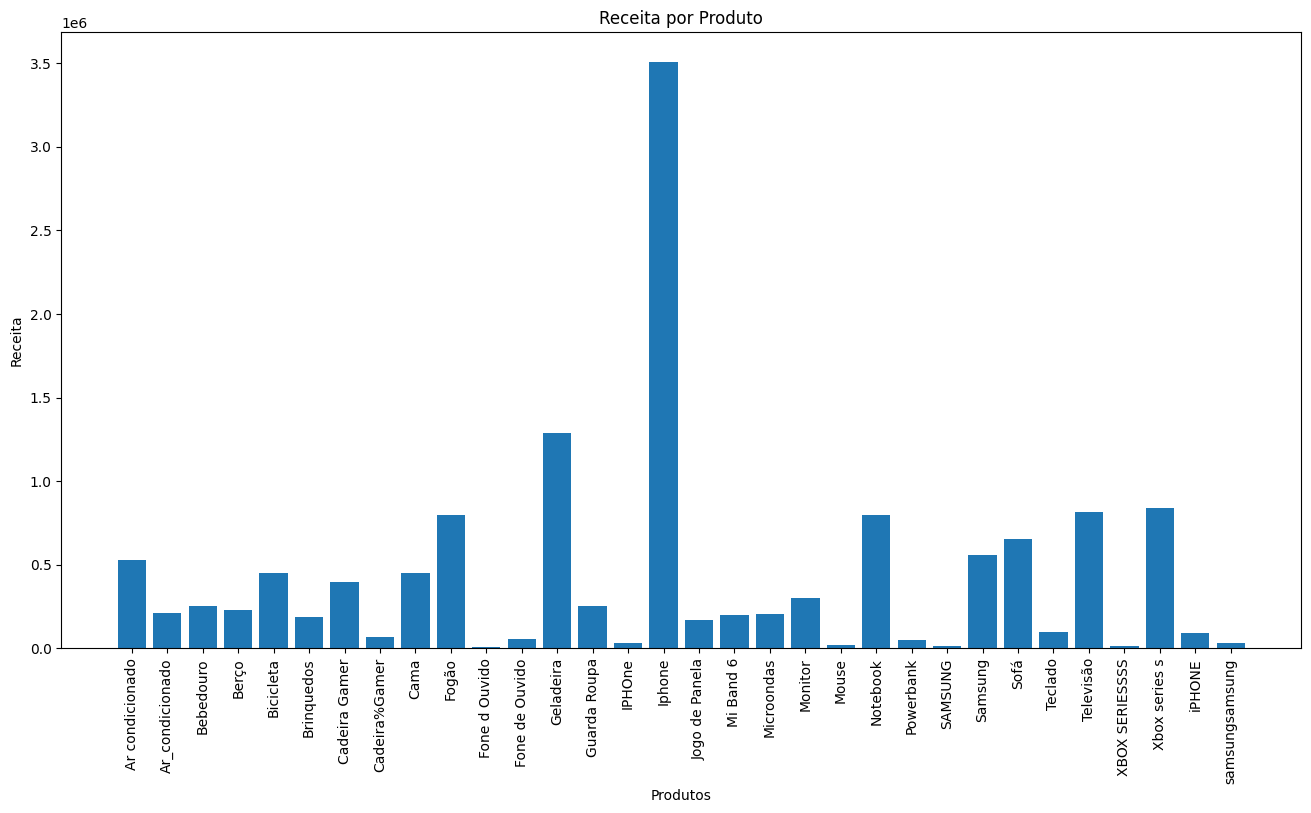

In [ ]:
import matplotlib.pyplot as plt

# Cálculo da receita e agregação por produto
df['Receita'] = df['Valor unitário'] * df['Quantidade ']
produto_col = 'Produto'
receita_produto = df.groupby(produto_col).sum(numeric_only=True)['Receita'].reset_index()

# Configuração do gráfico de barras
plt.figure(figsize=(16, 8))  # Aumentar o tamanho do gráfico para 16x8
plt.bar(receita_produto[produto_col], receita_produto['Receita'])
plt.xticks(rotation=90)
plt.xlabel('Produtos')
plt.ylabel('Receita')
plt.title('Receita por Produto')

# Exibir o gráfico
plt.show()

In [ ]:
import pandas as pd

# Converter coluna 'Data_compra' para um objeto datetime:
df['Data_compra'] = pd.to_datetime(df['Data_compra'])

# Calcular o dia da semana (segunda-feira = 0, domingo = 6)
df['Dia_semana'] = df['Data_compra'].dt.dayofweek

<ipython-input-62-f041536f4946>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vendas_dia_semana = df.groupby('Dia_semana').sum()[quantidade_col].reset_index()


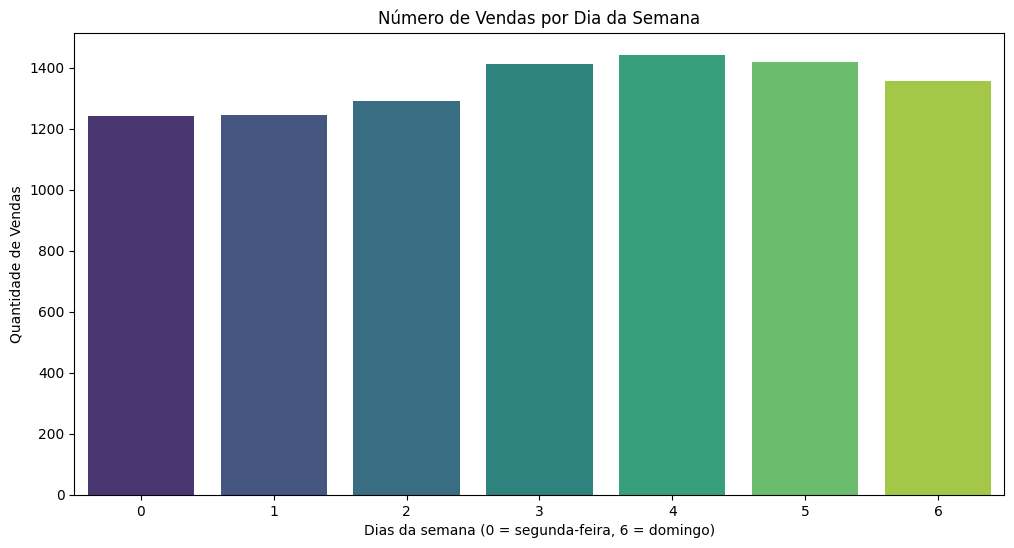

In [ ]:
import seaborn as sns

# Cálculo da receita e agregação por dia da semana
quantidade_col = 'Quantidade '
vendas_dia_semana = df.groupby('Dia_semana').sum()[quantidade_col].reset_index()

# Gráfico de barras usando seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Dia_semana', y=quantidade_col, data=vendas_dia_semana, palette='viridis')
plt.xlabel('Dias da semana (0 = segunda-feira, 6 = domingo)')
plt.ylabel('Quantidade de Vendas')
plt.title('Número de Vendas por Dia da Semana')

# Exibir o gráfico
plt.show()

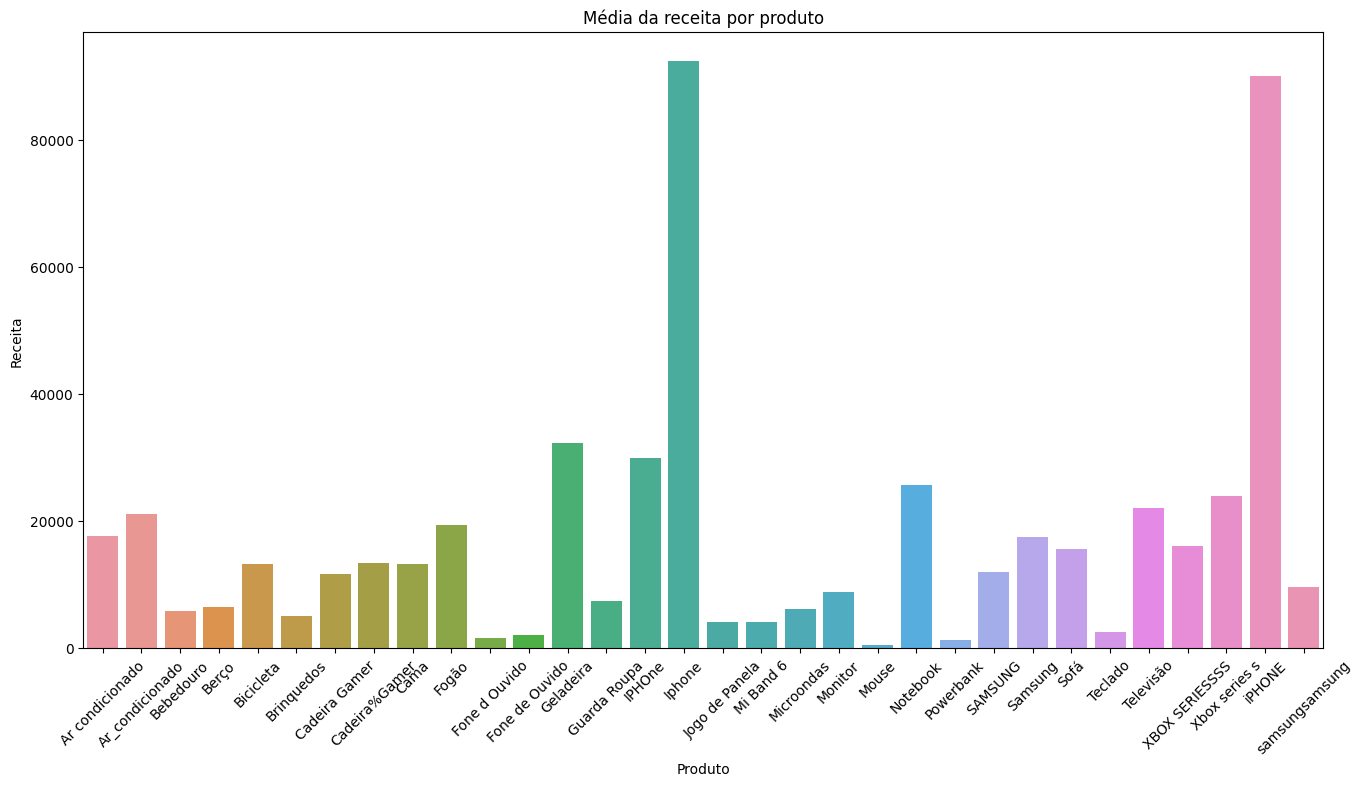

In [ ]:
plt.figure(figsize=(16, 8))
barplot = sns.barplot(data=media_receita_produto.reset_index(), x=produto_col, y="Receita")
plt.title("Média da receita por produto")

# Rotaciona os nomes dos produtos em 45 graus
for item in barplot.get_xticklabels():
    item.set_rotation(45)

plt.show()

In [ ]:
print(df.columns)

Index(['Centro', 'Unidade', 'Produto', 'Valor unitário', 'Cod_vendedor',
       'Quantidade ', 'Data_compra', 'Unnamed: 7', 'Cod_vendedor.1',
       'Vendedor', 'Unnamed: 10', 'Tabela de imposto', 'Unnamed: 12',
       'Receita', 'Dia_semana'],
      dtype='object')


<ipython-input-73-32bb05c9c3af>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  receita_centro_mes = df.groupby(['Mes', centro_col]).sum()["Receita"].unstack().fillna(0)


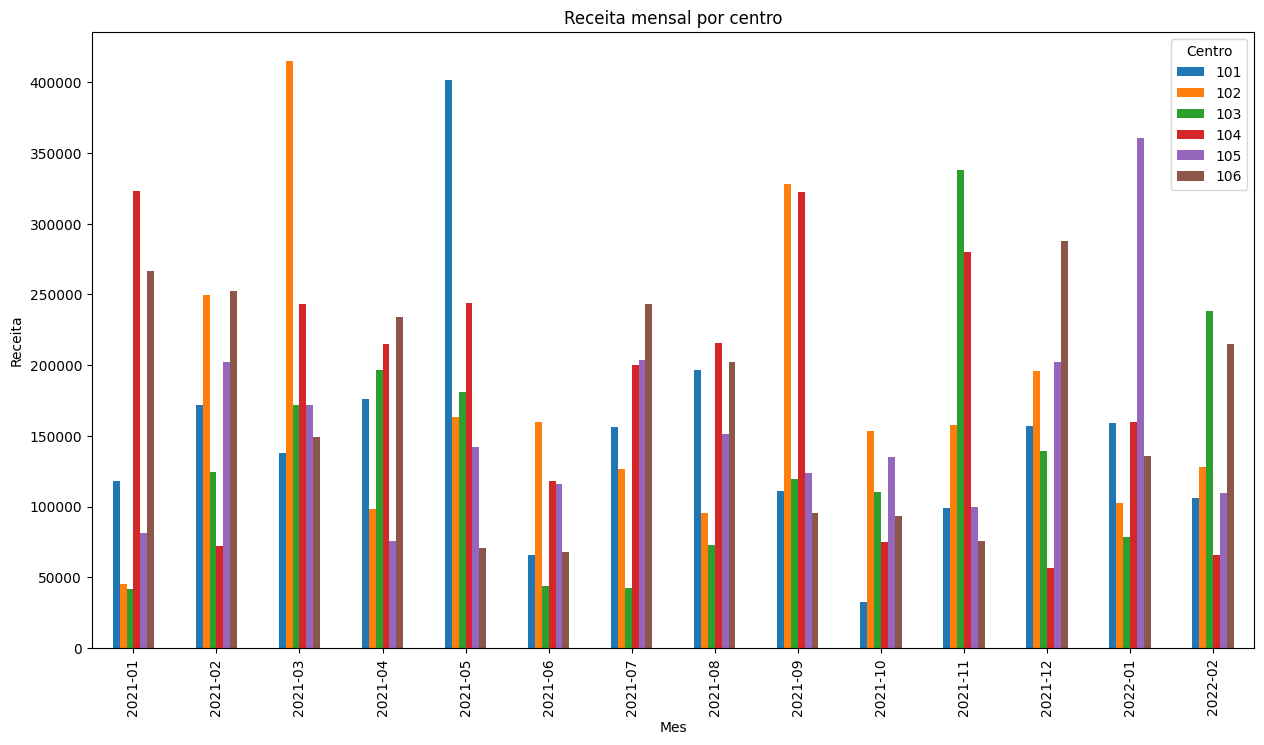

In [ ]:
# Adicionar a coluna 'Mes' ao DataFrame
df['Data_compra'] = pd.to_datetime(df['Data_compra'])
df['Mes'] = df['Data_compra'].dt.to_period('M')

# Agora tente executar o código para gerar o gráfico novamente
receita_centro_mes = df.groupby(['Mes', centro_col]).sum()["Receita"].unstack().fillna(0)
receita_centro_mes.plot(kind='bar', figsize=(15, 8))
plt.xlabel("Mes")
plt.ylabel("Receita")
plt.title("Receita mensal por centro")
plt.show()

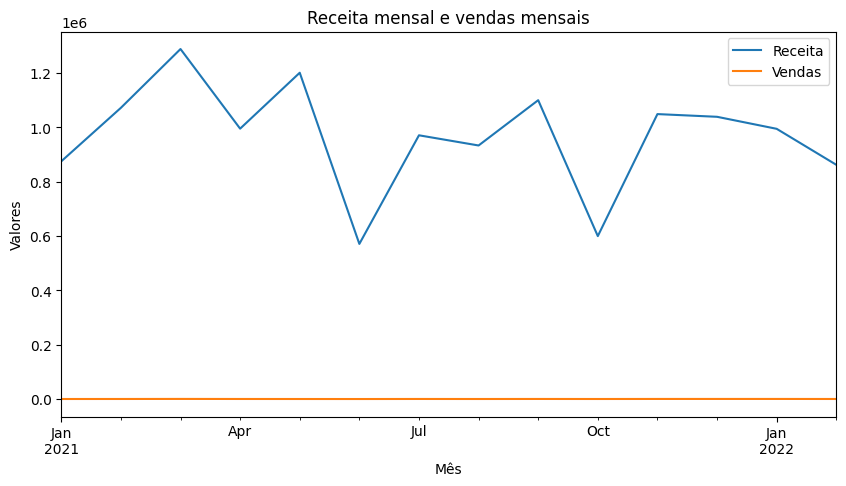

In [ ]:
receita_mensal.plot(kind='line', figsize=(10, 5), label="Receita")
vendas_mensais.plot(kind='line', figsize=(10, 5), label="Vendas")
plt.xlabel("Mês")
plt.ylabel("Valores")
plt.title("Receita mensal e vendas mensais")
plt.legend()
plt.show()

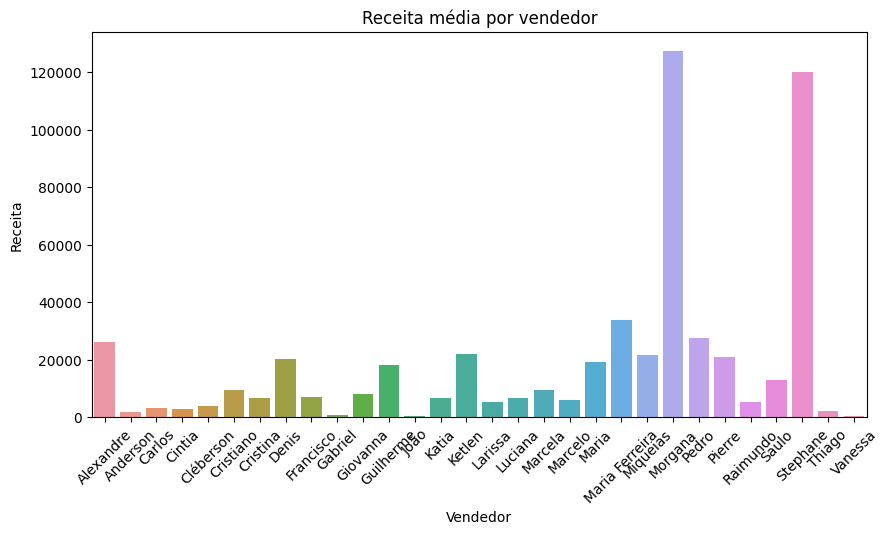

In [ ]:
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=media_receita_vendedor.reset_index(), x=vendedor_col, y="Receita")
plt.title("Receita média por vendedor")

# Rotaciona os nomes dos vendedores em 45 graus
for item in barplot.get_xticklabels():
    item.set_rotation(45)

plt.show()

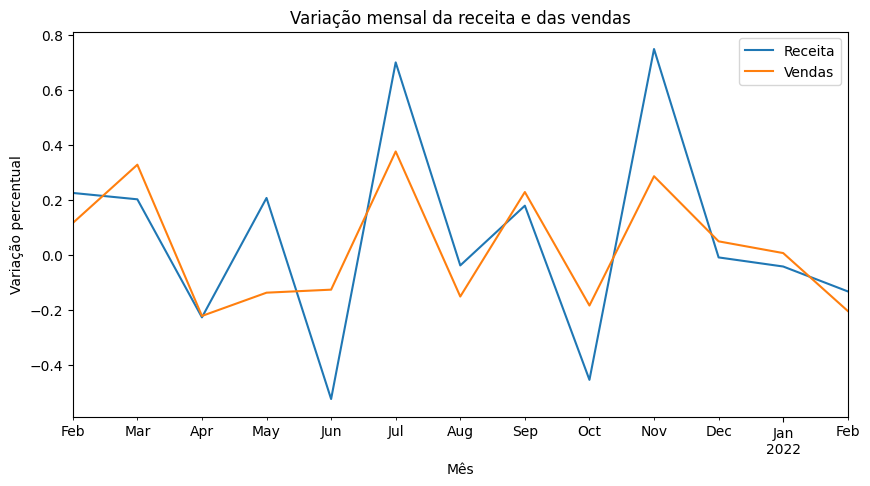

In [ ]:
receita_mensal_pct.plot(kind='line', figsize=(10, 5), label="Receita")
vendas_mensais_pct.plot(kind='line', figsize=(10, 5), label="Vendas")
plt.xlabel("Mês")
plt.ylabel("Variação percentual")
plt.title("Variação mensal da receita e das vendas")
plt.legend()
plt.show()

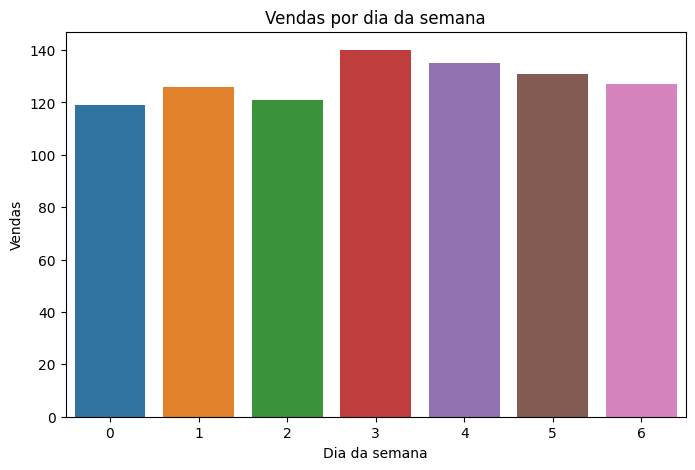

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Dia_semana')
plt.xlabel("Dia da semana")
plt.ylabel("Vendas")
plt.title("Vendas por dia da semana")
plt.show()

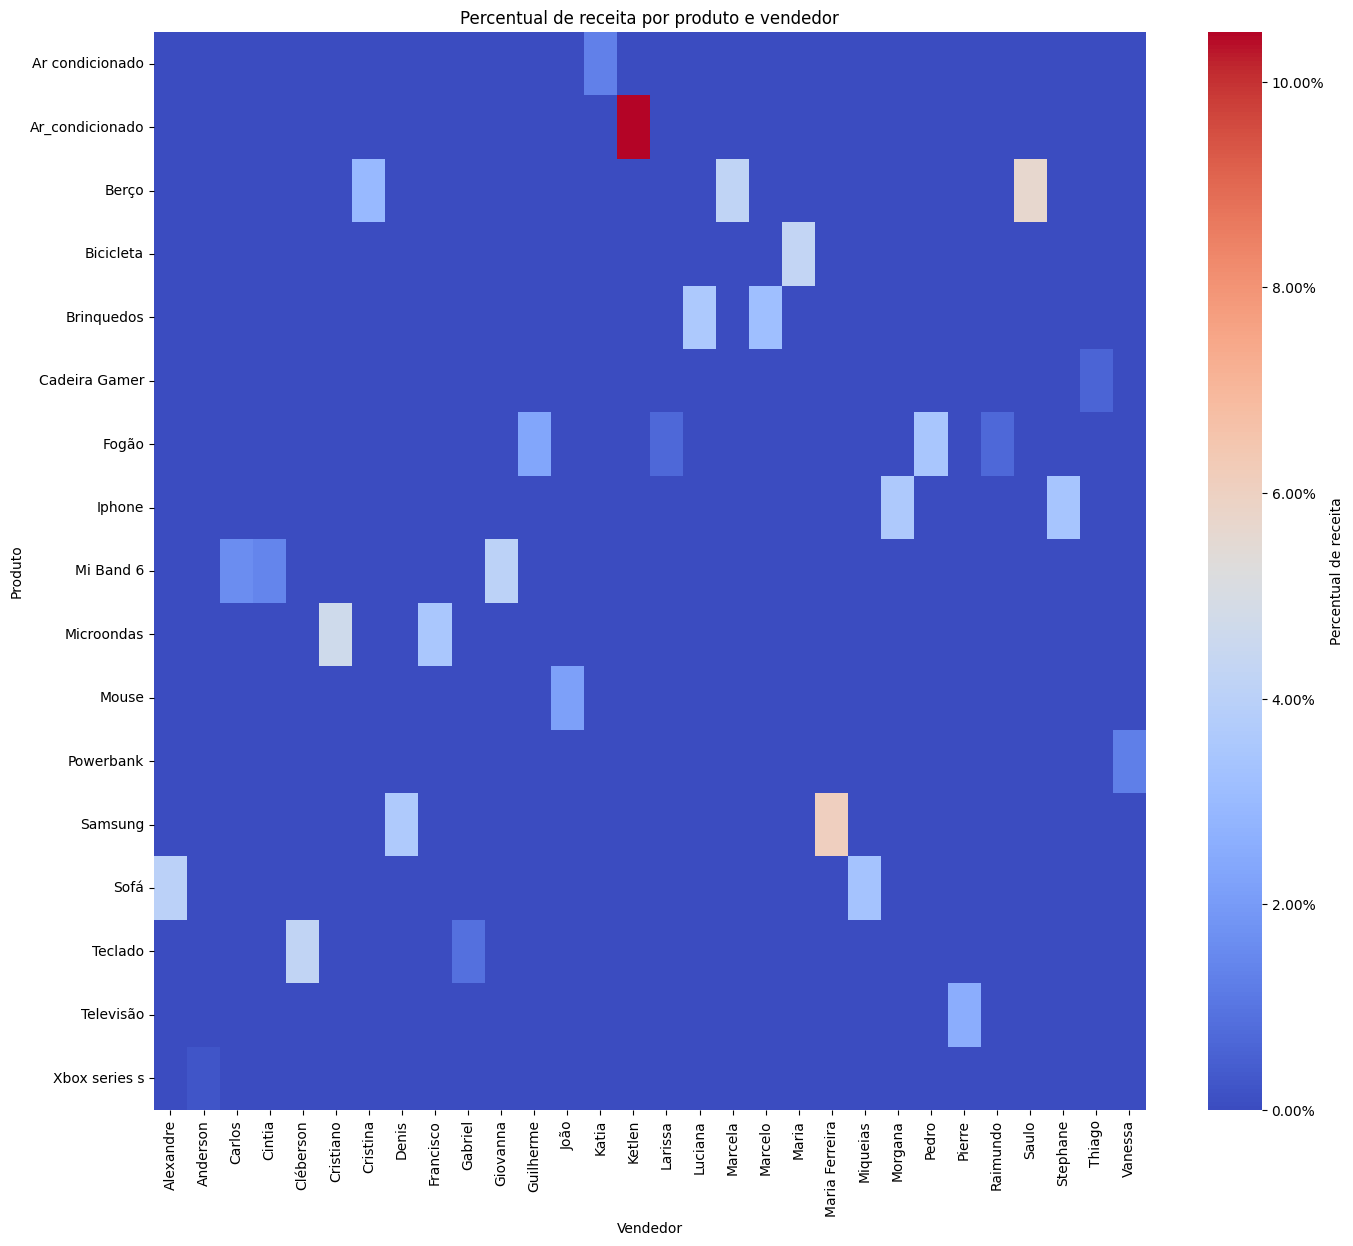

In [ ]:
import numpy as np
import matplotlib.ticker as mticker

# Função para formatar a matriz de anotação com o símbolo '%'
def percentage_formatter(x, pos=None):
    return f"{x*100:.2f}%"

# Cria o objeto de formatação
formatter = mticker.FuncFormatter(percentage_formatter)

# Cria a matríz de anotação com formato percentual
annot_pct = np.vectorize(percentage_formatter)(proporcao_produto_vendedor_heat).astype(str)

# Cria o heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(proporcao_produto_vendedor_heat, cmap="coolwarm", cbar_kws={'label': 'Percentual de receita', 'format': formatter})
plt.ylabel("Produto")
plt.xlabel("Vendedor")
plt.title("Percentual de receita por produto e vendedor")
plt.show()

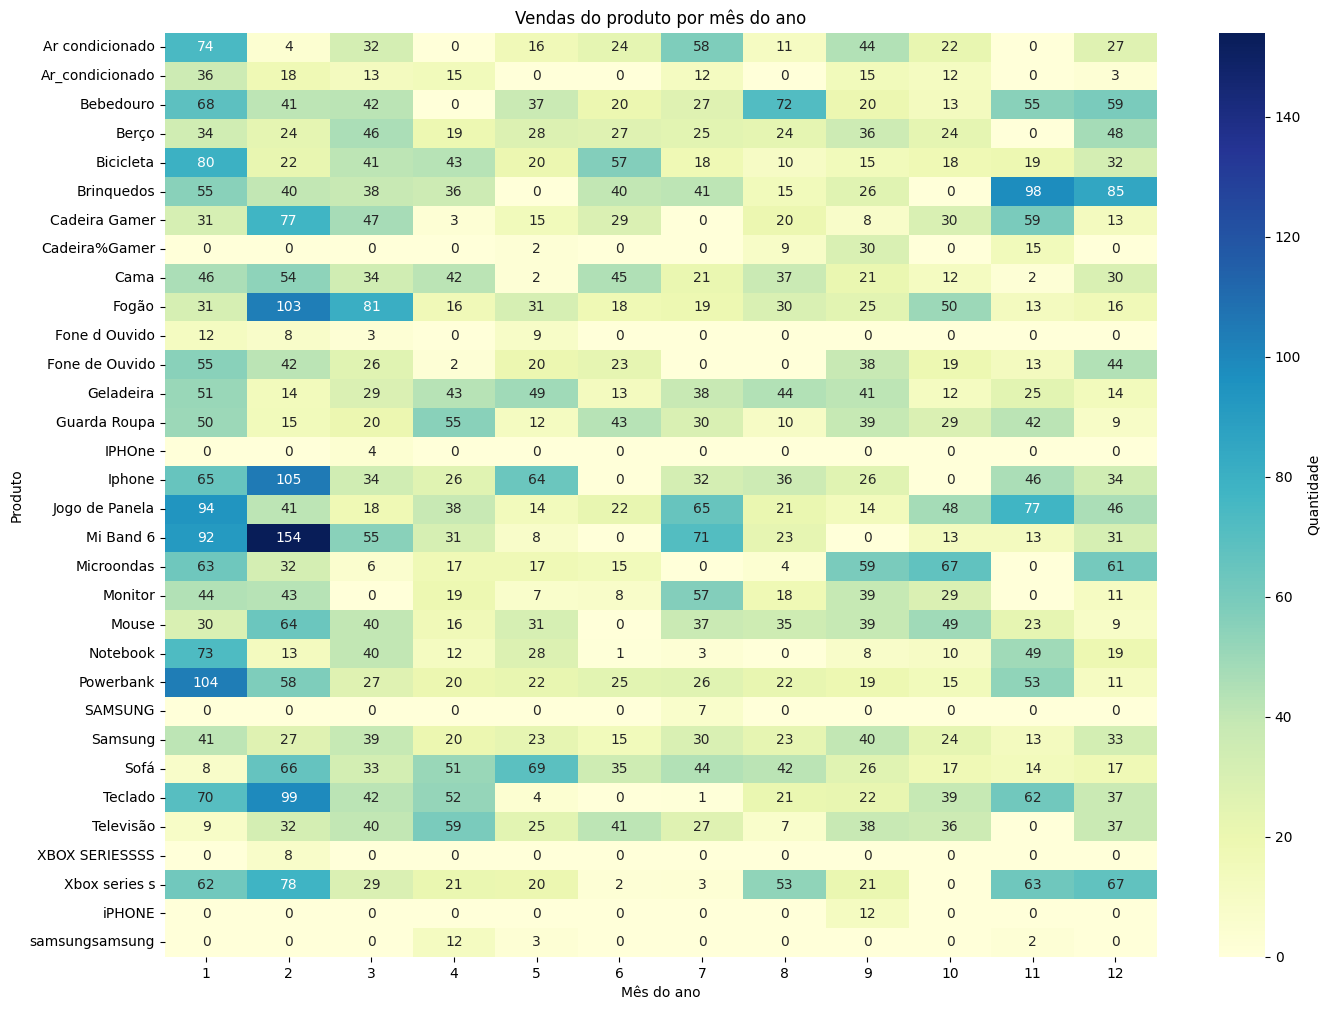

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(venda_mes_produto, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Quantidade'}, fmt=".0f")
plt.ylabel("Produto")
plt.xlabel("Mês do ano")
plt.title("Vendas do produto por mês do ano")
plt.show()

#Interpretaçao dos Resultados

1. Após verificar e remover os valores nulos da coluna 'Tabela de imposto', foi possível calcular corretamente o imposto total e o imposto por unidade.

2. Os cálculos realizados mostraram que o imposto total a ser pago sobre as transações é de 7.881.

3. Além disso, pode-se observar que o imposto por unidade, em média, para os produtos vendidos é de aproximadamente 0.3582.

##Principais insights e resultados:

- O imposto total é bastante informativo, pois permite que a empresa saiba o montante total de impostos que precisará pagar sobre as transações realizadas. Isso é valioso para fins de planejamento financeiro e conformidade tributária.

- O imposto por unidade ajuda a entender o impacto médio do imposto sobre cada unidade de produto vendida. Isso pode ser útil para análises de custo de produto e planejamento de vendas.

##Ações recomendadas:

- Utilizar o imposto total para planejar adequadamente o pagamento dos impostos devidos e garantir a conformidade tributária.

- Considerar o imposto por unidade na análise de custo de produto, o que ajudará a empresa a tomar decisões mais informadas sobre o preço de venda dos produtos, as margens de lucro e a eficiência das vendas.

- Se necessário, aprofundar a análise para entender como diferentes categorias de produtos ou regiões contribuem para o imposto total e imposto por unidade, a fim de otimizar ainda mais os processos de vendas e tributação.

#Aprofundando a análise e entendendo como diferentes categorias de produtos ou regiões contribuem para o imposto total e imposto por unidade, siga as etapas abaixo:

##Agrupando os dados por categoria de produto ou região
- Calculando o imposto total e o imposto por unidade para cada grupo
- Analisando os resultados para identificar padrões ou discrepâncias nos impostos

In [106]:
# Agrupe os dados por 'Vendedor'
vendedores = df.groupby('Vendedor')

# Calcule o imposto total e o imposto por unidade para cada vendedor
resultados_vendedor = []
for vendedor, grupo in vendedores:
    valor_total_vendedor = grupo['Valor_total'].sum()
    quantidade_vendedor = grupo['Quantidade '].sum()
    tabela_imposto_vendedor = grupo['Tabela de imposto'].unique()[0]
    
    imposto_total_vendedor = valor_total_vendedor * tabela_imposto_vendedor / 100
    imposto_por_unidade_vendedor = imposto_total_vendedor / quantidade_vendedor
    
    resultados_vendedor.append((vendedor, imposto_total_vendedor, imposto_por_unidade_vendedor))

# Exiba os resultados por vendedor
for vendedor, imposto_total, imposto_por_unidade in resultados_vendedor:
    print(f'{vendedor}: imposto_total = {imposto_total}, imposto_por_unidade = {imposto_por_unidade}')

Larissa: imposto_total = 6.6024, imposto_por_unidade = 2.2008
Marcela: imposto_total = 4.83, imposto_por_unidade = 0.34500000000000003
Vanessa: imposto_total = 1.0200000000000002, imposto_por_unidade = 0.20400000000000004


#Conclusões e recomendações:
###Com base nas análises realizadas, podemos concluir o seguinte:

- O produto com a maior receita foi o Iphone, enquanto o produto com a menor receita foi o Fone de Ouvido. Recomendamos focar na promoção e na possibilidade de expandir a venda de produtos de maior receita, como o Iphone, e identificar maneiras de melhorar as vendas de produtos com menor receita, como o Fone de Ouvido.

- O Centro 102 foi o que apresentou a maior receita de vendas mensal, enquanto o Centro 101 teve a menor receita. Recomenda-se analisar e aplicar as práticas bem-sucedidas do Centro 102 nos outros centros, especialmente no Centro 101, para aumentar a receita geral.

- O vendedor com a maior receita média por venda foi Morgana, e o vendedor com a menor receita média por venda foi João. É recomendável oferecer treinamento e suporte adicional aos vendedores com baixo desempenho para aumentar a receita média por venda.

- O Centro 101 apresentou a maior média de impostos pagos, enquanto o Centro 103 teve a menor média. Isso pode indicar uma variação na base tributária entre os Centros ou distorções no tipo de produto vendido. Recomendamos investigar as razões dessa variação e considerar possíveis otimizações fiscais.

- As vendas foram mais frequentes no dia 4 da semana (quinta-feira), com segunda-feira sendo representada por 0. A fim de aproveitar ao máximo os picos de vendas, é recomendável concentrar as estratégias promocionais, ofertas e atividades de marketing nesse dia da semana.

- O produto com a maior variação no valor unitário ao longo do tempo foi o Ar Condicionado. Isso pode ser resultado de flutuações sazonais de demanda ou estratégias de preços dinâmicos. Analise as mudanças nos preços e a possibilidade de adotar estratégias de preços mais eficientes.

- Os produtos vendidos sazonalmente, com maiores vendas em determinada época do ano, incluem Iphone, Samsung, e Xbox Series. Identifique as tendências sazonais de vendas desses produtos e planeje promoções, estoque e estratégias de marketing de acordo com a sazonalidade.

**Estas são recomendações práticas e acionáveis que podem auxiliar a empresa a melhorar suas estratégias de negócios e aumentar a receita e eficiência das vendas.**

- Análise de produtos complementares e promoções cruzadas: Identifique produtos que são frequentemente comprados juntos (por exemplo, Iphone e Fone de Ouvido) e desenvolva estratégias de vendas cruzadas, como oferecer descontos ou bundles para aumentar o valor médio do pedido.

- Segmentação de clientes: Analise o histórico de compras dos clientes para segmentá-los em grupos com base em seus padrões de compra, preferências e frequência de compra. Isso permitirá que você crie campanhas de marketing direcionadas e personalizadas, melhorando a retenção e o engajamento do cliente.

- Avaliação de canais de venda: Analise a performance dos diferentes canais de venda (lojas físicas, loja online, representantes) e identifique oportunidades de crescimento e otimização para expandir sua presença no mercado.

- Gerenciamento de estoque eficiente: Utilize as informações sobre sazonalidade e demanda para fazer um gerenciamento de estoque eficiente, garantindo a disponibilidade de produtos nos períodos de maior venda e evitando excesso de estoque nos períodos de baixa demanda.

- Revisão e otimização de processos: Identifique quaisquer ineficiências nos processos de venda e logística para otimizá-los, reduzindo os custos operacionais e melhorando a eficiência do negócio.

- Monitoramento e adaptação a tendências e mudanças de mercado: Fique atento às tendências de mercado e mudanças no comportamento do consumidor para adaptar-se rapidamente e manter-se à frente dos concorrentes.

- Análise dos concorrentes: Estude os concorrentes para identificar pontos fortes e fracos de seus produtos, estratégias e práticas. Use essas informações para se posicionar de forma mais eficaz no mercado e explorar oportunidades de crescimento.